In [1]:
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
import numpyro_stein.stein.kernels as kernels
from numpyro_stein.stein.autoguides import AutoDelta
from numpyro_stein.util import init_with_noise
from numpyro_stein.stein.stein import SVGD
from numpyro_stein.stein.kernels import SteinKernel
from numpyro.infer import ELBO
from numpyro.infer.util import init_to_value
import seaborn as sns
import os
import jax
import jax.numpy as np
from random import randint

In [2]:
rng_key = jax.random.PRNGKey(randint(0, int(1e6)))
num_iterations = 6000

In [3]:
def model():
    numpyro.sample('x', dist.MultivariateNormal(loc=np.array([5., 10.]), covariance_matrix=[[3., 5.], 
                                                                                            [5., 10.]]))

In [4]:
guide = AutoDelta(model, init_strategy=init_with_noise(init_to_value({'x': np.array([-10., 30.])}), noise_scale=1.0))
svgd = SVGD(model, guide, numpyro.optim.Adagrad(step_size=1.0), ELBO(),
            kernels.RBFKernel(mode='vector'), num_stein_particles=100, num_loss_particles=3)
svgd_state = svgd.init(rng_key)

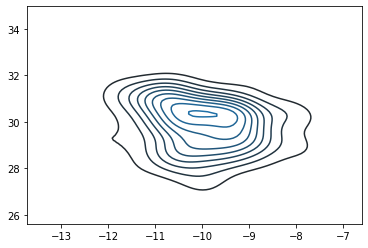

In [5]:
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])


In [8]:
for i in range(num_iterations):
    svgd_state, loss = svgd.update(svgd_state)
    if i % 100 == 0:
        print(loss)

4.105481
4.070105
4.041217
4.016857
3.979859
3.9584217
3.933619
3.913499
3.8937676
3.87927
3.8627102
3.8441205
3.8300037
3.8182354
3.8070288


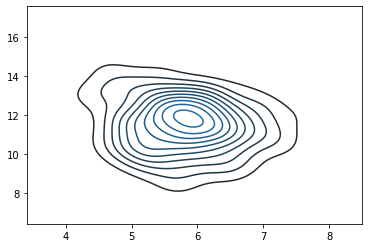

In [10]:
plt.clf()
sns.kdeplot(svgd.get_params(svgd_state)['auto_x'][:, 0], svgd.get_params(svgd_state)['auto_x'][:, 1])

In [14]:
svgd.get_params(svgd_state)['auto_x']

DeviceArray([[ 2.3976245,  7.4999566],
             [ 4.5136046,  8.639371 ],
             [ 3.772051 ,  9.776641 ],
             [ 4.8438315, 10.747857 ],
             [ 5.1323776,  9.551814 ],
             [ 3.2919703,  8.80059  ],
             [ 1.7153212,  4.7906756],
             [ 6.3215957, 12.322804 ],
             [ 3.9001215,  7.6865983],
             [ 4.450255 ,  9.747983 ],
             [ 4.1656985,  8.461964 ],
             [ 4.9718766,  8.6272   ],
             [ 4.822575 , 11.687958 ],
             [ 7.210335 , 13.633446 ],
             [ 4.800352 ,  7.3152213],
             [ 5.8899827,  9.704803 ],
             [ 6.7701554, 12.763784 ],
             [ 7.003578 , 12.572072 ],
             [ 5.428516 ,  9.807053 ],
             [ 2.958317 ,  4.722225 ],
             [ 5.8504405, 12.308439 ],
             [ 1.9123563,  5.695544 ],
             [ 7.649843 , 15.465647 ],
             [ 9.384064 , 17.995176 ],
             [ 4.7978797,  9.891847 ],
             [ 3.7142043,